### Graph/Network Mining

In this notebook, we will use Facebook combined ego networks dataset. The dataset description is [here](https://snap.stanford.edu/data/egonets-Facebook.html). 

This network contains the aggregated network of ten individuals’ Facebook friends list. There are two columns in this file representing the nodes, and each row represents a link. 

Data Location: /dsa/data/DSA-8410/graph/facebook_combined.txt

### Environment Setup

In [1]:
import sys
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.community.lukes import lukes_partitioning
import pandas as pd
%matplotlib inline

### T1. Create the network

In [4]:
# Using read_fwf for fixed width file appears to give 2 columns as intended

data = pd.read_fwf('/dsa/data/DSA-8410/graph/facebook_combined.txt')

In [5]:
data.head()

,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


In [7]:
# Creating a graph

g=nx.Graph()

for indx, row in data.iterrows():
    g.add_edge(row[0], row[1])

### T2: Show the number of eges and nodes

In [8]:
g.number_of_edges()

1249

In [9]:
g.number_of_nodes()

456

### T3. Show min, max, and avg degress for this network

In [10]:
deg = g.degree()

In [11]:
min(deg, key=lambda x: x[1])

('2', 1)

In [12]:
max(deg, key=lambda x: x[1])

(0, 346)

In [13]:
avg_degree = sum([d for n, d in deg]) / g.number_of_nodes()
avg_degree

5.478070175438597

### T4. Show a degree distrbution plot


Text(0, 0.5, '# of Nodes')

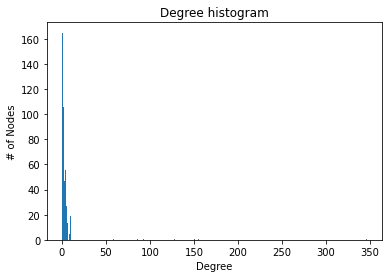

In [14]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

### T5. Print top-10 nodes in terms of high degree

In [15]:
sorted_degrees = sorted(deg, key=lambda x: x[1], reverse=True)
sorted_degrees[:10] 

[(0, 346),
 (3, 155),
 (1, 151),
 (2, 128),
 (9, 98),
 (4, 93),
 (5, 86),
 (6, 75),
 (8, 59),
 (7, 58)]

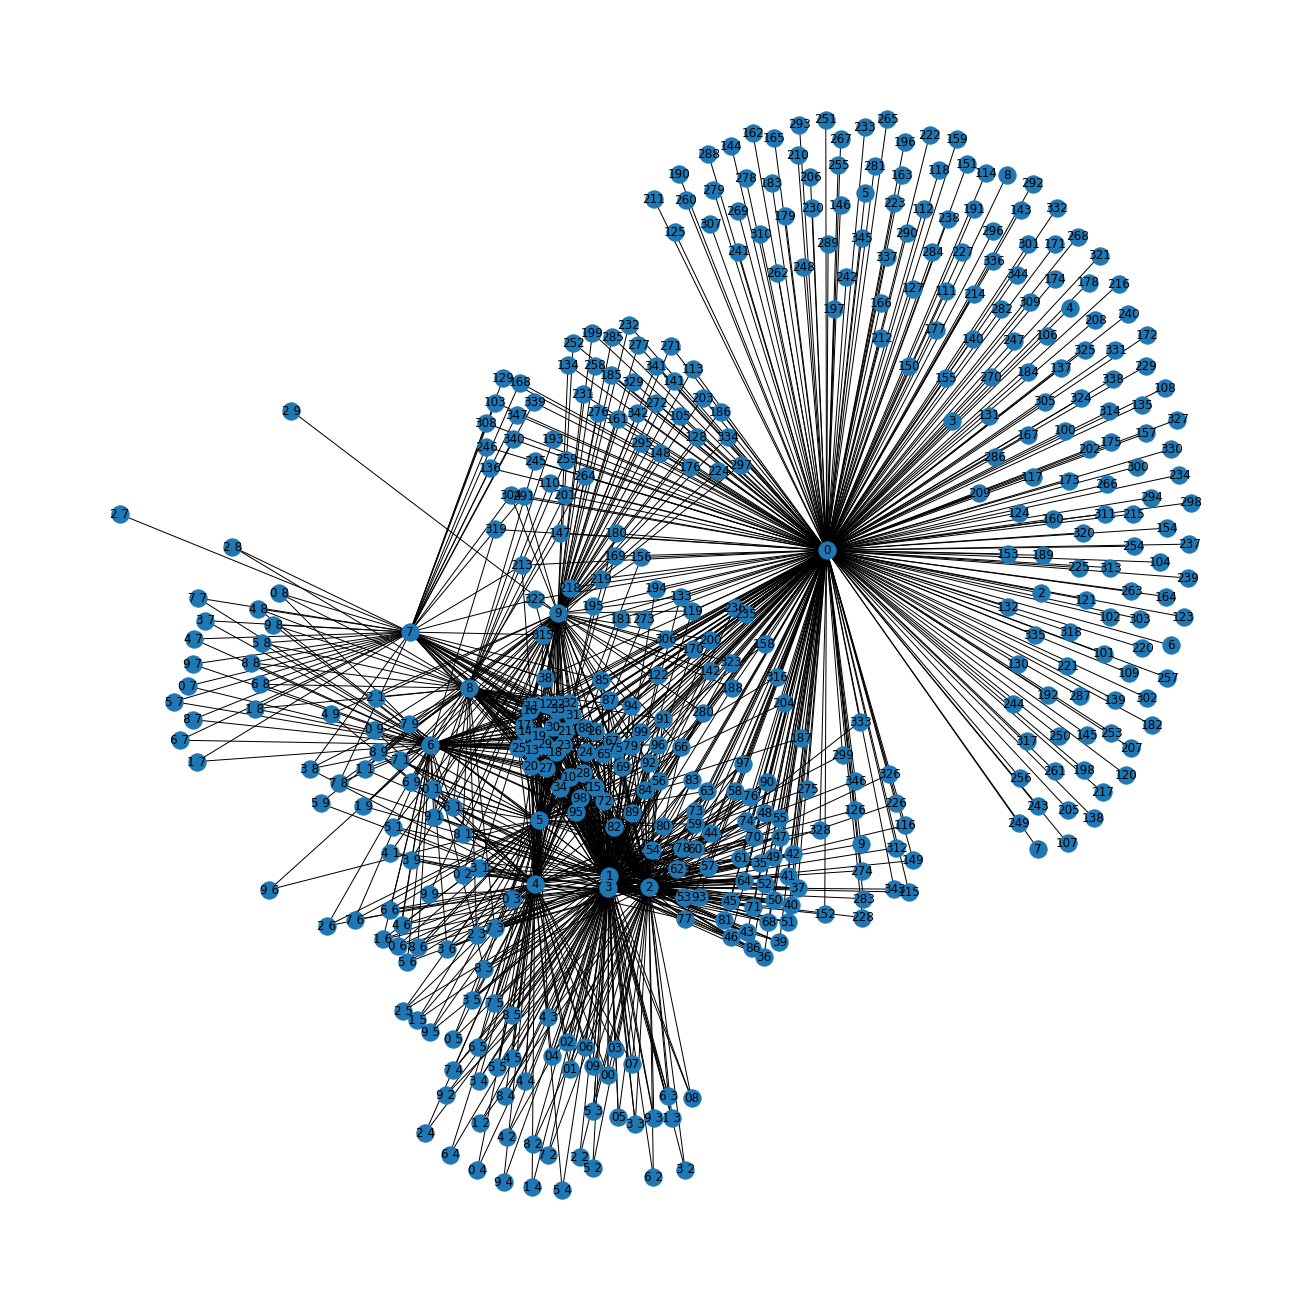

In [16]:
# For fun, what's the graph look like

layout = nx.spring_layout(g)
plt.figure(figsize=(18,18))
nx.draw(g, layout, with_labels = True)